In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [182]:
df_transactions = pd.read_csv('Retail_Data_Transactions.csv')
df_response = pd.read_csv('Retail_Data_Response.csv')

In [ ]:
df_transactions.info()

In [183]:
df_transactions['DateTrans'] = pd.to_datetime(df_transactions['trans_date'])

<AxesSubplot:>

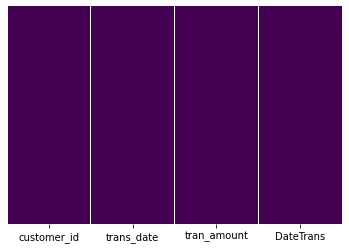

In [184]:
sns.heatmap(df_transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing data on Dataframe

### Customer Information


In [185]:
Customers = df_transactions.groupby(['customer_id']).sum()
Mean = df_transactions.groupby(['customer_id']).mean()

/home/marcos/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

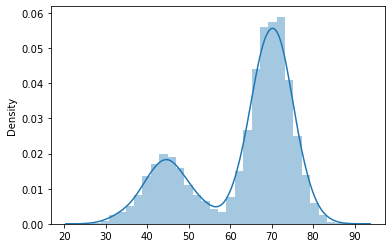

In [186]:
sns.distplot(Mean)

In [187]:
LastPurchaseData = max(df_transactions['DateTrans'])

In [188]:
Customers['Mean'] = Mean
CustomerLastPurchase = df_transactions[['DateTrans', 'customer_id']]
CustomerLastPurchase = CustomerLastPurchase.groupby(['customer_id']).max()
Customers['DSLastPurchaseDate'] = LastPurchaseData - CustomerLastPurchase
Customers['DSLastPurchaseDate'] = pd.DataFrame(Customers['DSLastPurchaseDate'].astype('timedelta64[D]'))
Transactions = df_transactions[['DateTrans', 'customer_id']]
Customers['NumberOfTransactions']= Transactions.groupby(['customer_id']).count()

Customers.head()

,tran_amount,Mean,DSLastPurchaseDate,NumberOfTransactions
customer_id,,,,
CS1112,1012,67.466667,61.0,15
CS1113,1490,74.500000,35.0,20
CS1114,1432,75.368421,32.0,19
CS1115,1659,75.409091,11.0,22
CS1116,857,65.923077,203.0,13


In [ ]:
sns.displot(Customers['tran_amount'],bins=30)

In [ ]:
sns.displot(Customers['NumberOfTransactions'],bins=30)

In [ ]:
sns.displot(Customers['DSLastPurchaseDate'],bins=30)

## K-means Clustering

In [189]:
from sklearn.cluster import KMeans

In [193]:
X_Amount = Customers[['tran_amount', 'DSLastPurchaseDate', 'NumberOfTransactions']]
model = KMeans(n_clusters=3)
model.fit(X_Amount)
CustomerCategory = model.predict(X_Amount)
CustomerCategory


array([2, 1, 2, ..., 0, 0, 0], dtype=int32)

In [199]:
model.cluster_centers_
Customers['Category'] = CustomerCategory.tolist()
Customers['id'] = np.arange(0,len(Customers)).tolist()
Customers.head()


,tran_amount,Mean,DSLastPurchaseDate,NumberOfTransactions,Category,id
customer_id,,,,,,
CS1112,1012,67.466667,61.0,15,2,0
CS1113,1490,74.500000,35.0,20,1,1
CS1114,1432,75.368421,32.0,19,2,2
CS1115,1659,75.409091,11.0,22,1,3
CS1116,857,65.923077,203.0,13,0,4


<AxesSubplot:xlabel='NumberOfTransactions', ylabel='tran_amount'>

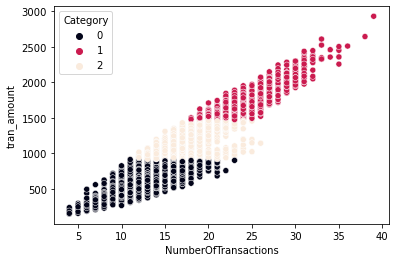

In [200]:
sns.scatterplot(x=Customers['NumberOfTransactions'],y=Customers['tran_amount'],data=Customers,hue='Category',palette='rocket')

In [262]:
test=Customers.copy()

test.loc[test['Category'] == 1,'Label'] = 'High Frequency and Value'
test.loc[test['Category'] == 2,'Label'] = 'Low Frequency and Value'
test.loc[test['Category'] == 0,'Label'] = 'Medium Frequency and Value'
test.head()


,tran_amount,Mean,DSLastPurchaseDate,NumberOfTransactions,Category,id,Label
customer_id,,,,,,,
CS1112,1012,67.466667,61.0,15,2,0,Low Frequency and Value
CS1113,1490,74.500000,35.0,20,1,1,High Frequency and Value
CS1114,1432,75.368421,32.0,19,2,2,Low Frequency and Value
CS1115,1659,75.409091,11.0,22,1,3,High Frequency and Value
CS1116,857,65.923077,203.0,13,0,4,Medium Frequency and Value


/home/marcos/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


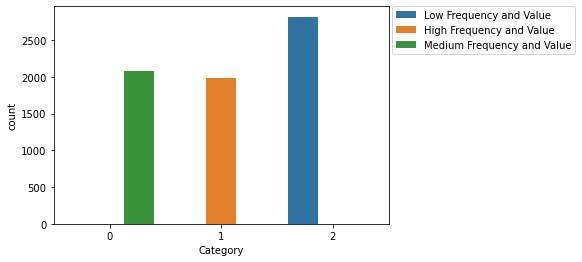

In [263]:
sns.countplot(test['Category'],data=test,hue='Label')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [264]:
HFV_df = test.loc[test['Category'] == 1]
HFV_df.quantile([.25, .5, .75, 1])

,tran_amount,Mean,DSLastPurchaseDate,NumberOfTransactions,Category,id
0.25,1565.0,68.478261,16.0,22.0,1.0,1234.50
0.50,1676.0,71.327381,39.0,24.0,1.0,2426.00
0.75,1830.0,74.129058,79.0,26.0,1.0,3750.75
1.00,2933.0,85.631579,392.0,39.0,1.0,4999.00


In [265]:
test.loc[test['NumberOfTransactions'] >= 39 ,'TransactionsScore'] = 4
test.loc[(test['NumberOfTransactions'] >= 26) & (test['NumberOfTransactions'] < 39),'TransactionsScore'] = 3
test.loc[(test['NumberOfTransactions'] >= 24) & (test['NumberOfTransactions'] < 26),'TransactionsScore'] = 2
test.loc[test['NumberOfTransactions'] < 24,'TransactionsScore'] = 1

test.loc[test['DSLastPurchaseDate'] <= 16 ,'DaysScore'] = 4
test.loc[(test['DSLastPurchaseDate'] <= 39) & (test['DSLastPurchaseDate'] > 16),'DaysScore'] = 3
test.loc[(test['DSLastPurchaseDate'] <= 79) & (test['DSLastPurchaseDate'] > 39),'DaysScore'] = 2
test.loc[test['DSLastPurchaseDate'] > 79,'DaysScore'] = 1

test.loc[test['tran_amount'] >=1830 ,'AmountScore'] = 4
test.loc[(test['tran_amount'] >= 1676) & (test['tran_amount'] < 1830),'AmountScore'] = 3
test.loc[(test['tran_amount'] >= 1565) & (test['tran_amount'] < 1676),'AmountScore'] = 2
test.loc[test['tran_amount'] < 1565,'AmountScore'] = 1

In [270]:
test['OvhScore']=pd.DataFrame((test['TransactionsScore'] + test['DaysScore'] + test['AmountScore'])/3)
test.drop(['tran_amount','Mean','DSLastPurchaseDate','NumberOfTransactions','Category'],axis=1,inplace=True)


,id,Label,TransactionsScore,DaysScore,AmountScore,OvhScore
customer_id,,,,,,
CS1112,0,Low Frequency and Value,1.0,2.0,1.0,1.333333
CS1113,1,High Frequency and Value,1.0,3.0,1.0,1.666667
CS1114,2,Low Frequency and Value,1.0,3.0,1.0,1.666667
CS1115,3,High Frequency and Value,1.0,4.0,2.0,2.333333
CS1116,4,Medium Frequency and Value,1.0,1.0,1.0,1.000000


## Export Dataframe to .db file

In [271]:
import sqlite3

In [275]:
conn = sqlite3.connect('CustomersDB.db')
c = conn.cursor()
c.execute('Create Table Customers (CustomerID,id,Label,TransactionScore,DaysScore,AmountScore,OvhScore)')
conn.commit()

In [276]:
test.to_sql('Customers', conn, if_exists='replace', index = True)

In [285]:
test.to_csv ('Customers.csv', index = False, header=True)